In [1]:
#Loading Imports
import networkx as nx
import matplotlib.pyplot as plt
import random
import json
from networkx.readwrite import json_graph


In [2]:
#Defining Constants
COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400
EDGE_BG_WEIGHT = 4
EDGE_FG_WEIGHT = 24
MATRIX_SIDE = 10
NO_FG_NODES = 20
FIG_SIZE = (12, 12)

In [3]:

#Add nodes with default background color and size
matrix = nx.Graph()
for i in range(MATRIX_SIDE):
    for j in range(MATRIX_SIDE):
        matrix.add_node((i, j), color=COLOR_BG, size=SIZE_BG_NODES)

In [4]:
#Function to display the graph

def plot_graph(graph, title):
    plt.figure(figsize=FIG_SIZE)
    pos = {node: node for node in graph.nodes()}
    edges = [graph.edges[edge]['color'] for edge in graph.edges()]
    weights = [graph.edges[edge]['weight'] for edge in graph.edges()]
    nx.draw(graph, pos, node_size=[graph.nodes[node]['size'] for node in graph.nodes()],
            node_color=[graph.nodes[node]['color'] for node in graph.nodes()],
            edge_color=edges, width=weights, with_labels=False)
    plt.title(title)
    plt.show()

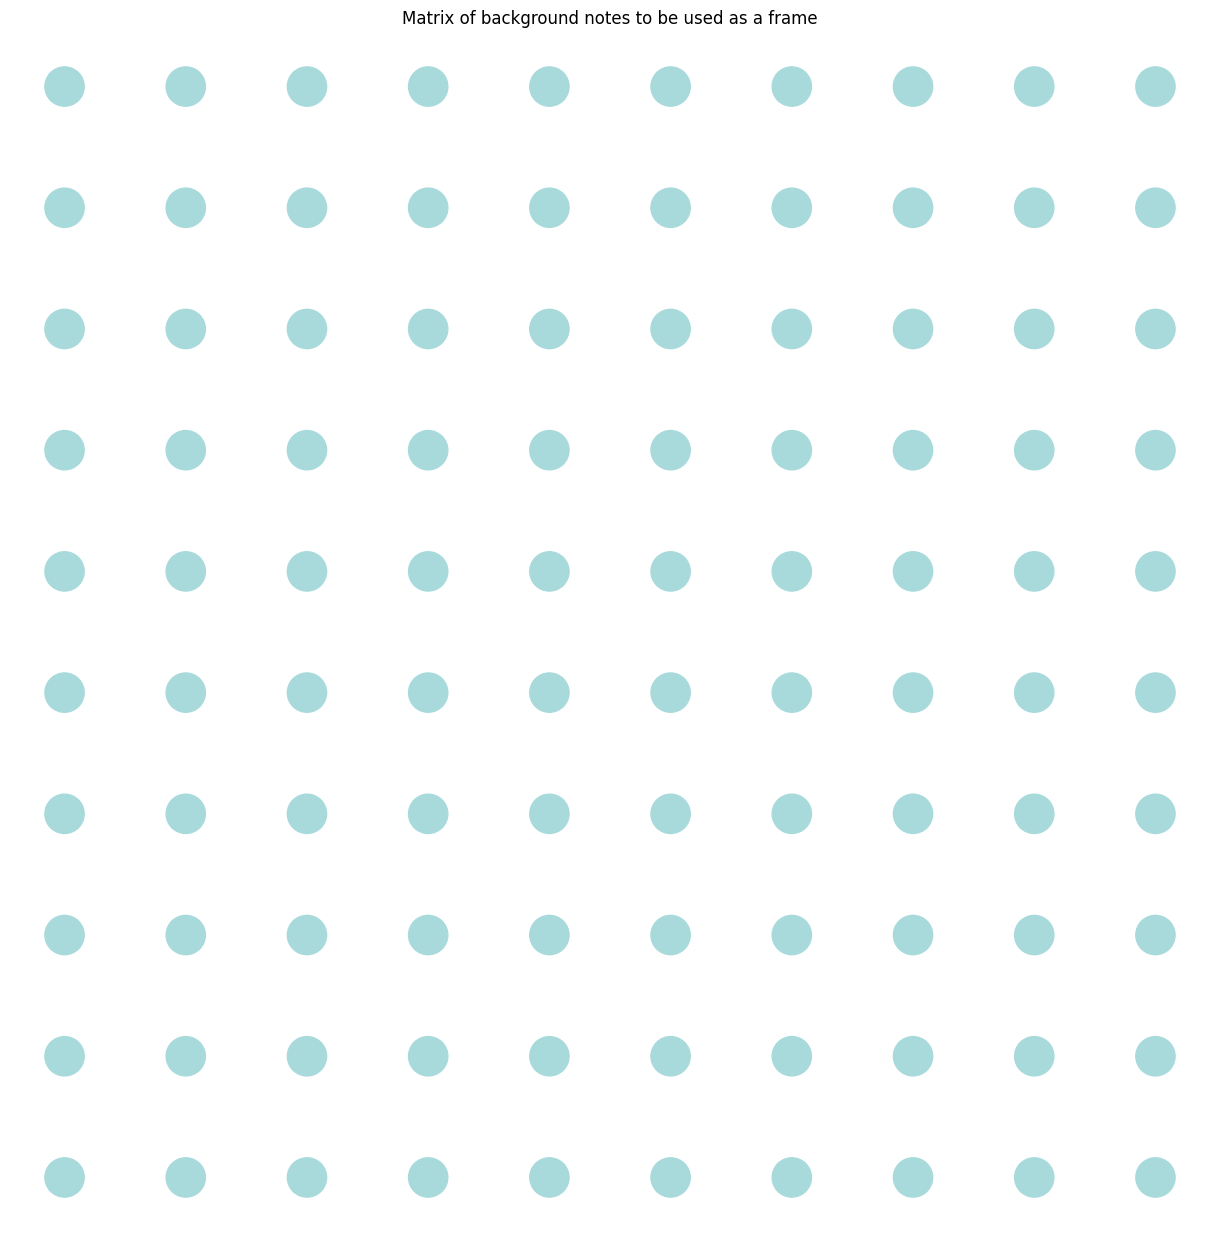

In [5]:
plot_graph(matrix, "Matrix of background notes to be used as a frame")

**Task 2**

In [6]:

# Choose randomly NO_FG_NODES background nodes and convert them to foreground
fg_nodes = random.sample([(i, j) for i in range(1, MATRIX_SIDE - 1) for j in range(1, MATRIX_SIDE - 1)], NO_FG_NODES)
for node in fg_nodes:
    # Update color and size for foreground nodes
    matrix.nodes[node]['color'] = COLOR_FG
    matrix.nodes[node]['size'] = SIZE_FG_NODES

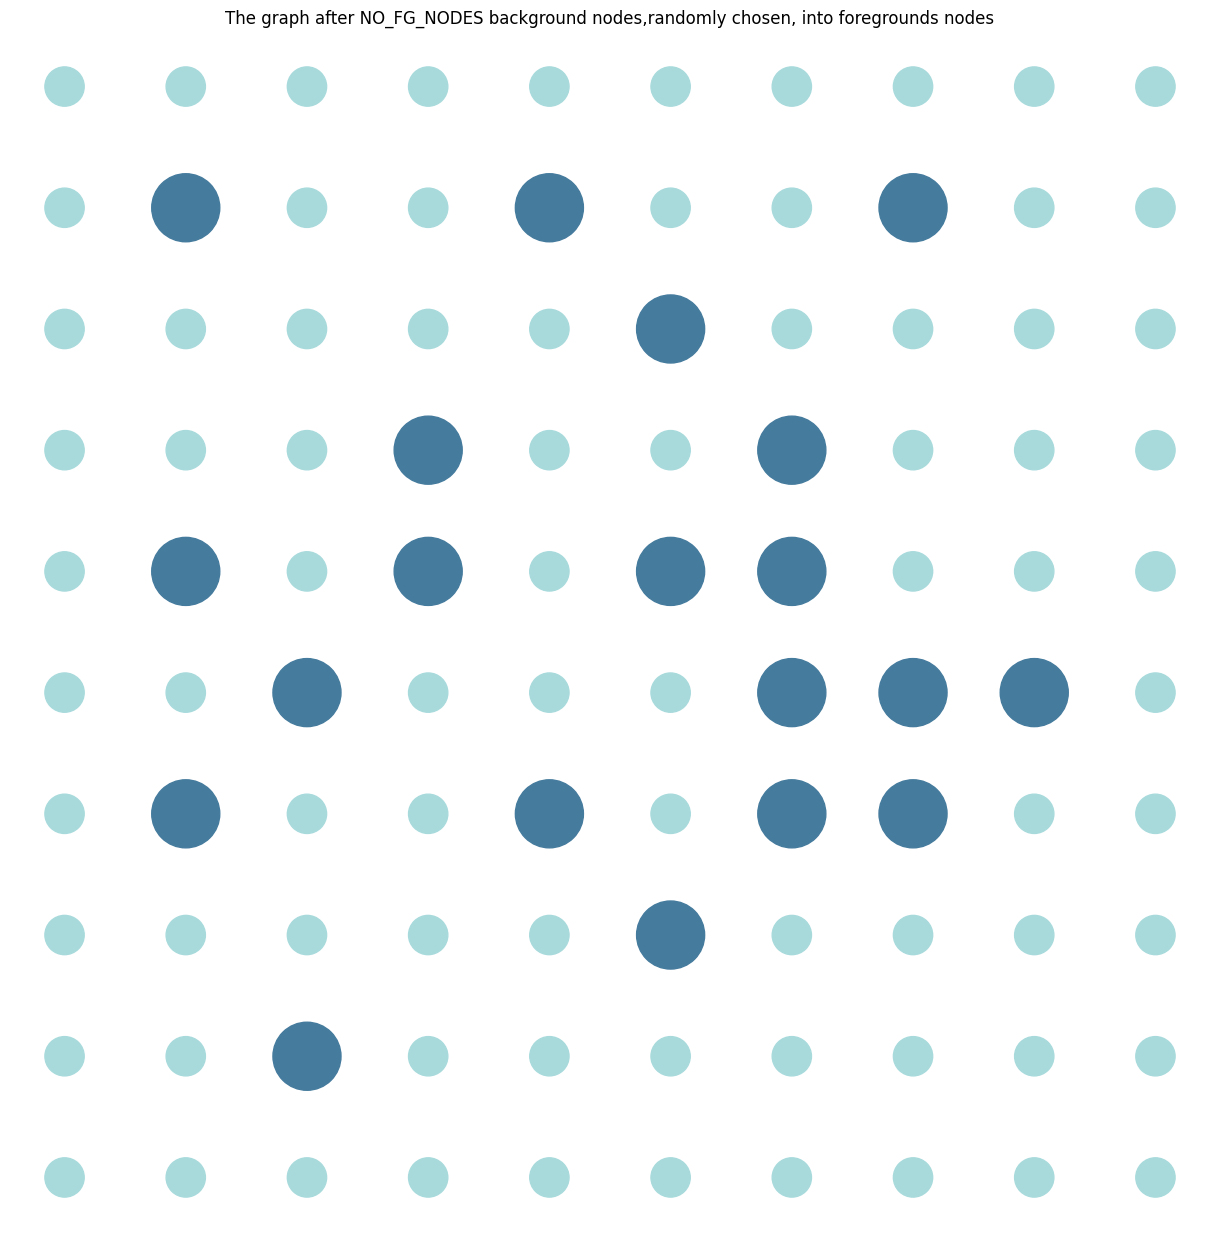

In [7]:
plot_graph(matrix, "The graph after NO_FG_NODES background nodes,randomly chosen, into foregrounds nodes")

In [8]:

# Add edges
for i in range(MATRIX_SIDE):
    for j in range(MATRIX_SIDE):
        current_node = (i, j)

        # Connect horizontally and vertically within the same type
        if i < MATRIX_SIDE - 1:
            neighbor_node = (i + 1, j)
            if matrix.nodes[current_node]['color'] == matrix.nodes[neighbor_node]['color']:
                # Determine edge color and weight based on node color
                edge_color = COLOR_FG if matrix.nodes[current_node]['color'] == COLOR_FG else COLOR_BG
                edge_weight = EDGE_FG_WEIGHT if matrix.nodes[current_node]['color'] == COLOR_FG else EDGE_BG_WEIGHT
                # Add the edge to the graph
                matrix.add_edge(current_node, neighbor_node, color=edge_color, weight=edge_weight)

        if j < MATRIX_SIDE - 1:
            neighbor_node = (i, j + 1)
            if matrix.nodes[current_node]['color'] == matrix.nodes[neighbor_node]['color']:
                # Determine edge color and weight based on node color
                edge_color = COLOR_FG if matrix.nodes[current_node]['color'] == COLOR_FG else COLOR_BG
                edge_weight = EDGE_FG_WEIGHT if matrix.nodes[current_node]['color'] == COLOR_FG else EDGE_BG_WEIGHT
                # Add the edge to the graph
                matrix.add_edge(current_node, neighbor_node, color=edge_color, weight=edge_weight)

        # Connect diagonally for background nodes only if the diagonal node is also background
        if matrix.nodes[current_node]['color'] == COLOR_BG:
            if i < MATRIX_SIDE - 1 and j < MATRIX_SIDE - 1 and matrix.nodes[(i + 1, j + 1)]['color'] == COLOR_BG:
                diagonal_node = (i + 1, j + 1)
                # Add diagonal background edge to the graph
                matrix.add_edge(current_node, diagonal_node, color=COLOR_BG, weight=EDGE_BG_WEIGHT)

            if i < MATRIX_SIDE - 1 and j > 0 and matrix.nodes[(i + 1, j - 1)]['color'] == COLOR_BG:
                diagonal_node = (i + 1, j - 1)
                # Add diagonal background edge to the graph
                matrix.add_edge(current_node, diagonal_node, color=COLOR_BG, weight=EDGE_BG_WEIGHT)

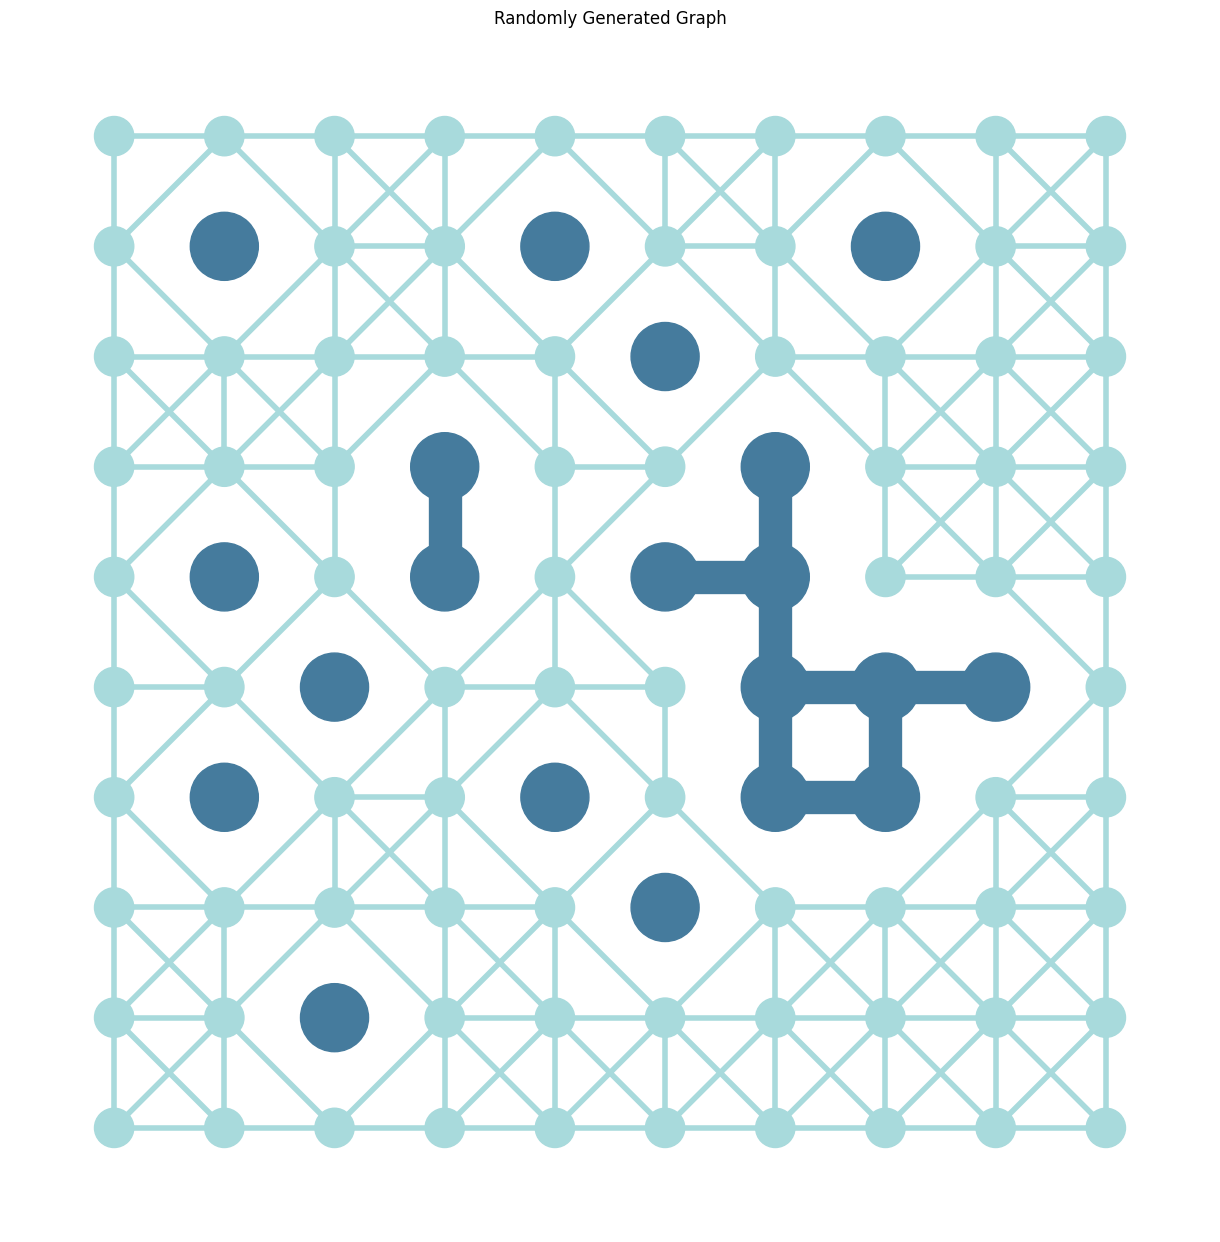

In [9]:
plot_graph(matrix, "Randomly Generated Graph")

In [10]:

#graph info
#print("Graph Info:",nx.info(foreground_matrix))
print("Number of Nodes: ", matrix.number_of_nodes())
print("Number of Edges: ", matrix.number_of_edges())
# calculate the average degree of nodes
avg_degree = sum(dict(matrix.degree()).values()) / len(matrix.nodes)
print("Average Degree of Nodes: ", avg_degree)

#density of the graph
density = nx.density(matrix)
print(f"Graph Density: {density:.4f}")

#degree centrality of nodes
degree_centrality = nx.degree_centrality(matrix)
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

Number of Nodes:  100
Number of Edges:  213
Average Degree of Nodes:  4.26
Graph Density: 0.0430
Degree Centrality:
Node (0, 0): 0.0303
Node (0, 1): 0.0505
Node (0, 2): 0.0404
Node (0, 3): 0.0404
Node (0, 4): 0.0303
Node (0, 5): 0.0404
Node (0, 6): 0.0404
Node (0, 7): 0.0404
Node (0, 8): 0.0404
Node (0, 9): 0.0202
Node (1, 0): 0.0404
Node (1, 1): 0.0707
Node (1, 2): 0.0606
Node (1, 3): 0.0000
Node (1, 4): 0.0505
Node (1, 5): 0.0000
Node (1, 6): 0.0707
Node (1, 7): 0.0707
Node (1, 8): 0.0000
Node (1, 9): 0.0404
Node (2, 0): 0.0404
Node (2, 1): 0.0000
Node (2, 2): 0.0606
Node (2, 3): 0.0606
Node (2, 4): 0.0000
Node (2, 5): 0.0404
Node (2, 6): 0.0505
Node (2, 7): 0.0606
Node (2, 8): 0.0707
Node (2, 9): 0.0404
Node (3, 0): 0.0404
Node (3, 1): 0.0707
Node (3, 2): 0.0606
Node (3, 3): 0.0606
Node (3, 4): 0.0505
Node (3, 5): 0.0101
Node (3, 6): 0.0101
Node (3, 7): 0.0606
Node (3, 8): 0.0707
Node (3, 9): 0.0404
Node (4, 0): 0.0505
Node (4, 1): 0.0707
Node (4, 2): 0.0606
Node (4, 3): 0.0000
Node

In [11]:

#Import to JSON File

# Convert foreground_matrix to JSON format
data = json_graph.node_link_data(matrix)

# Create a new JSON object with relevant information as required in Activity 2 from 'data'.
json_data = {
        "directed": data["directed"],
        "multigraph": data["multigraph"],
        "graph": data["graph"],
        "nodes": [
            {
                "color": node_data.get('color', COLOR_BG),
                "node_type": "fg" if node_data.get('color', COLOR_BG) == COLOR_FG else "bg",
                "id": f"{int(node_data['id'][0])}-{int(node_data['id'][1])}"
            }
            for node_data in data["nodes"]
        ],
        "links": [
            {
                "color": edge_data.get('color', COLOR_BG),
                "weight": edge_data.get('weight', EDGE_BG_WEIGHT),
                "source": f"{int(edge_data['source'][0])}-{int(edge_data['source'][1])}",
                "target": f"{int(edge_data['target'][0])}-{int(edge_data['target'][1])}"
            }
            for edge_data in data["links"]
        ]
    }
# Write the JSON data to a file
with open("Activity_2_output_json_file.json", 'w') as json_file:
    json.dump(json_data, json_file, indent=3)